# Image data

Images are represented by computers in various formats, primarily as numerical arrays or matrices where each element corresponds to a **pixel** in the image — a basic unit which represents a single point in the image. The color and intensity of each pixel are represented by numbers.

## Grayscale images

Each pixel is represented by a single value (usually an integer in range $[0, 255]$) indicating the intensity of light, where 0 is black and 255 is white.

```{tip}
To install Python library `matplotlib` used for data visualization, run the command `pip install matplotlib`
```

In [1]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
img_RG = plt.imread("../images/RG-1930-grayscale.jpg")
print("Image shape:", img_RG.shape)
print("Size in bytes:", img_RG.nbytes)

Image shape: (876, 1200)
Size in bytes: 1051200


Pixel values:

In [2]:
img_RG

array([[ 16,  15,  11, ..., 200, 201, 201],
       [ 13,  11,   8, ..., 199, 200, 200],
       [ 12,  10,   8, ..., 197, 197, 198],
       ...,
       [ 77,  77,  78, ...,  58,  62,  65],
       [ 77,  77,  78, ...,  63,  69,  74],
       [ 77,  77,  78, ...,  66,  74,  79]], dtype=uint8)

Render the picture:

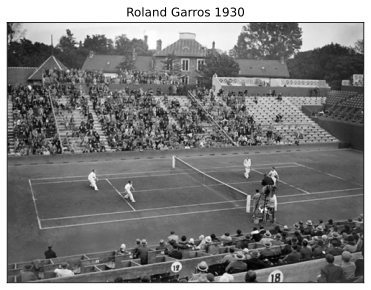

In [131]:
def show_image(img, title=None):
    plt.imshow(img, cmap="gray")
    if title is not None:
        plt.title(title)
    plt.yticks([])
    plt.xticks([]);

show_image(img_RG, "Roland Garros 1930")

## RGB images

Colored images have one additional dimension. In RGB scheme each pixel is represented by three values corresponding to the **R**ed, **G**reen, and **B**lue channels.

In [123]:
img_wim = plt.imread('../images/Isner-Mahut.jpg')
print("Image shape:", img_wim.shape)
print("Size in bytes:", img_wim.nbytes)

Image shape: (1372, 2440, 3)
Size in bytes: 10043040


Now image is a 3-dimensional tensor.

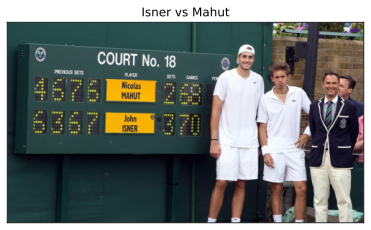

In [124]:
show_image(img_wim, "Isner vs Mahut")

Each channel can be represented as a grayscale image:

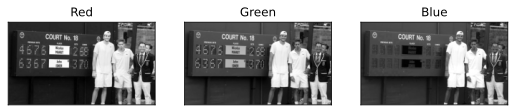

In [125]:
plt.figure(figsize=(9, 4))
plt.subplot(131)
show_image(img_wim[..., 0], "Red")
plt.subplot(132)
show_image(img_wim[..., 1], "Green")
plt.subplot(133)
show_image(img_wim[..., 2], "Blue")

Images are well suited for machine learning models because they are internaly stored in numeric form. In some sense they can be attributed to numeric data. 

Sometimes it is convenient to rescale pixel values to the range $[0,1]$.

In [142]:
img_RG_scaled = img_RG / 255
img_wim_scaled = img_wim / 255

After rescaling images are looking just as before:

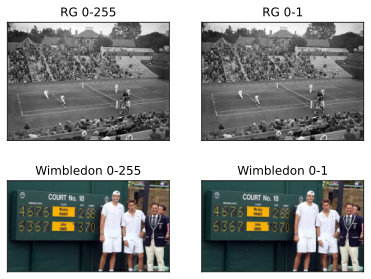

In [143]:
plt.subplot(221)
show_image(img_RG, "RG 0-255")
plt.subplot(222)
show_image(img_RG_scaled, "RG 0-1")
plt.subplot(223)
show_image(img_wim, "Wimbledon 0-255")
plt.subplot(224)
show_image(img_wim_scaled, "Wimbledon 0-1")

## Video

Video data is a sequence of images (frames) captured over time, often accompanied by audio. It is a rich source of information and is used in various fields like computer vision, video analytics, surveillance, media, entertainment, and more. Unlike other data types, video data requires specialized techniques for processing and analysis due to its temporal and spatial complexity.

[Example](https://sample-videos.com/video321/mp4/720/big_buck_bunny_720p_5mb.mp4) of a $30$-second video:

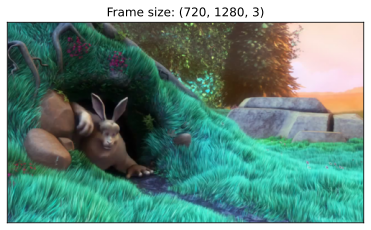

: 

In [175]:
import cv2
cap = cv2.VideoCapture("../images/big_buck_bunny.mp4")
_, frame = cap.read()
show_image(frame, f"Frame size: {frame.shape}")

Iterate over frames:

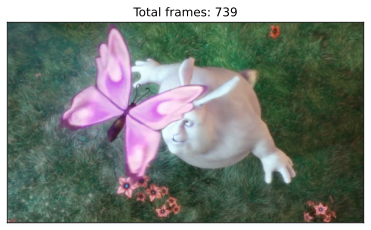

In [174]:
n_frames = 0
not_finished = True
while not_finished:
    n_frames += 1
    last_frame = frame.copy()
    not_finished, frame = cap.read()

show_image(last_frame, f"Total frames: {n_frames}")

## Exercises

1. How many numbers are required to describe a colored image of width $1920$ and height $1080$ have? How much memory?

2. Rescaled images consume significantly more memory than before. Why?

In [141]:
print("Rolang Garros (grayscale)")
print("  Before rescaling:", img_RG.nbytes)
print("  After rescaling:", img_RG_scaled.nbytes)
print("Wimbledon (colored)")
print("  Before rescaling:", img_wim.nbytes)
print("  After rescaling:", img_wim_scaled.nbytes)

Rolang Garros (grayscale)
  Before rescaling: 1051200
  After rescaling: 8409600
Wimbledon (colored)
  Before rescaling: 10043040
  After rescaling: 80344320
